In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from dataclasses import dataclass
from typing import List, Optional

In [2]:
@dataclass
class Triangle:
    start: float
    end: float 
    peak: float
    peak_value: float #(0,1)

        
    def slope(self,x):
        if x<= self.start:
            return 0
        if x>=self.end:
            return 0
        if x<=self.peak:
            return (x-self.start)/(self.peak-self.start)*self.peak_value
        return (self.end-x)/(self.end-self.peak)*self.peak_value

class MamdaniTriangle(Triangle):

    max_y: float = 1
    def __call__(self, x):
        return min(self.slope(x), self.max_y)

    def set_x(self, x):
        self.max_y = self.slope(x)
        
class LarsenTriangle(Triangle):
    new_peak : Optional[float] = None

    def __call__(self, x):
        if self.new_peak is None:
            return self.slope(x)
        return Triangle(start=self.start, end=self.end, peak=self.peak, peak_value=self.new_peak).slope(x)

    def set_x(self, x):
        self.new_peak = self.slope(x)
    
def rule_sum(callables, x):
    return max([call(x) for call in callables])          

def center_average_defuzzification(rules):
     return np.sum([rule_sum(rules,rule.peak)*rule.peak for rule in rules])/np.sum([rule_sum(rules,rule.peak) for rule in rules])

# Wnioskowanie Mamdaniego

In [3]:
mt1= MamdaniTriangle(start=1.0,end=3.0,peak=2.0,peak_value=1)
mt2= MamdaniTriangle(start=2.1,end=4.5,peak=3,peak_value=1)

rules = [mt1, mt2]

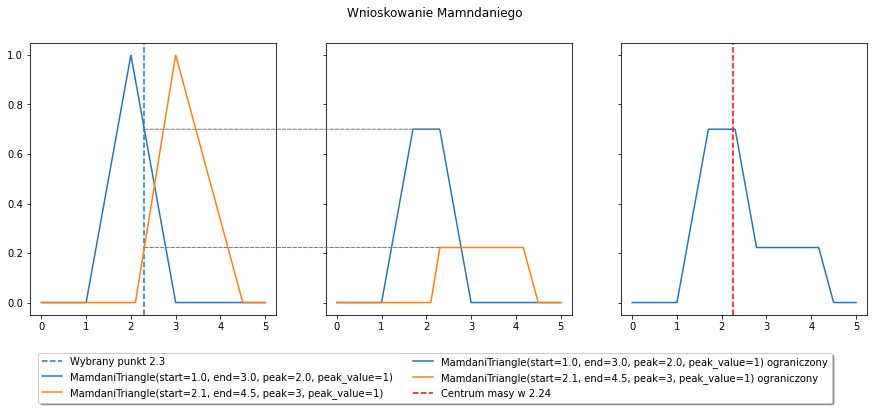

In [4]:
x = np.linspace(0,5,1000)
fig, axes = plt.subplots(1,3, sharey=True)
fig.set_size_inches(15, 5)


x_const = 2.3

for rule in rules:
    rule.set_x(x_const) 

axes[0].axvline(x=x_const, label=f"Wybrany punkt {x_const}", linestyle="--")
for rule in rules:
    y =[rule.slope(x1) for x1 in x]
    axes[0].plot(x, y, label=str(rule))

for rule in rules:
    y =[rule(x1) for x1 in x]
    axes[1].plot(x, y, label=f"{rule} ograniczony")
    
    xy=[x_const,rule(x_const)]
    con = ConnectionPatch(xyA=xy,coordsA=axes[0].transData,
                          xyB=xy, coordsB=axes[1].transData,
                           color="grey", linestyle ="--")
    fig.add_artist(con)
    
sum_y = [rule_sum(rules,x1) for x1 in x]
axes[2].plot(x, sum_y)

weight_center =center_average_defuzzification(rules)

axes[2].axvline(x=weight_center, label=f"Centrum masy w {weight_center:.2f}", linestyle="--", color="red")

fig.suptitle("Wnioskowanie Mamndaniego")
fig.legend(loc='center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

# Wnioskowanie Larsena

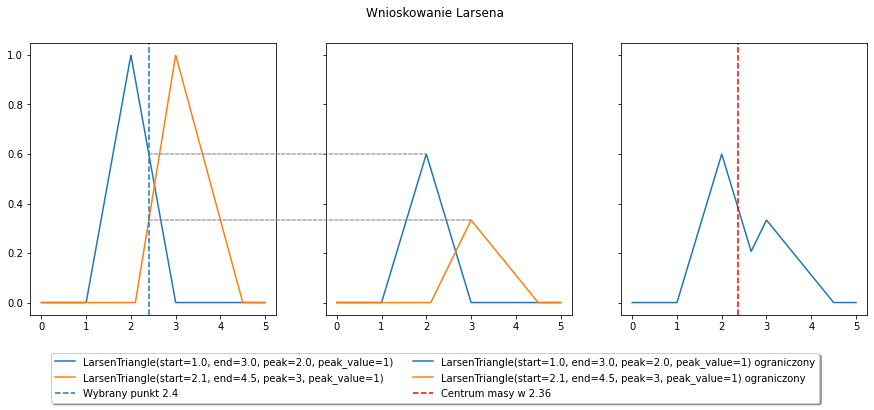

In [5]:
lt1= LarsenTriangle(start=1.0,end=3.0,peak=2.0, peak_value=1)
lt2= LarsenTriangle(start=2.1,end=4.5,peak=3, peak_value=1)

rules = [lt1, lt2]

x = np.linspace(0,5,1000)
fig, axes = plt.subplots(1,3, sharey=True)
fig.set_size_inches(15, 5)


x_const = 2.4

for rule in rules:
    y =[rule.slope(x1) for x1 in x]
    axes[0].plot(x, y, label=str(rule))

for rule in rules:
    rule.set_x(x_const) 

for rule in rules:
    xyA=[x_const, rule.slope(x_const)]
    xyB=[rule.peak, rule(rule.peak)]
    con = ConnectionPatch(xyA=xyA ,coordsA=axes[0].transData,
                          xyB=xyB, coordsB=axes[1].transData,
                           color="grey", linestyle ="--", label=f"linia {xyA} do {xyB}")
    fig.add_artist(con)



axes[0].axvline(x=x_const, label=f"Wybrany punkt {x_const}", linestyle="--")


for rule in rules:
    y =[rule(x1) for x1 in x]
    axes[1].plot(x, y, label=f"{rule} ograniczony")
    
    
sum_y = [rule_sum(rules,x1) for x1 in x]
axes[2].plot(x, sum_y)

weight_center =center_average_defuzzification(rules)

axes[2].axvline(x=weight_center, label=f"Centrum masy w {weight_center:.2f}", linestyle="--", color="red")

fig.suptitle("Wnioskowanie Larsena")
fig.legend(loc='center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)